In [1]:
#Turn each set of predictions into a raster
import geopandas as gpd
from shapely.geometry import Polygon
from geocube.api.core import make_geocube

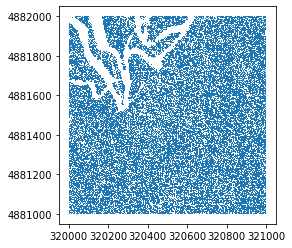

In [27]:
g = gpd.read_file("/Users/ben/Dropbox/Weecology/Crowns/examples/2019_BART_5_320000_4881000_image.shp")
g.head()

In [ ]:
g.plot()

In [31]:
#a numeric column to count
g["mask"] = 1

In [37]:
cube = make_geocube(vector_data=g, resolution=(-50, 50))

/Users/ben/miniconda3/envs/crowns/lib/python3.7/site-packages/datacube/utils/geometry/_base.py:301: DeprecationWarning: Please use `str(crs)` instead of `crs.crs_str`
  warnings.warn("Please use `str(crs)` instead of `crs.crs_str`", category=DeprecationWarning)


In [39]:
cube

<xarray.Dataset>
Dimensions:      (x: 20, y: 20)
Coordinates:
  * y            (y) float64 4.882e+06 4.882e+06 ... 4.881e+06 4.881e+06
  * x            (x) float64 3.2e+05 3.201e+05 3.201e+05 ... 3.209e+05 3.21e+05
    spatial_ref  int64 0
Data variables:
    left         (y, x) float64 nan 3.201e+05 nan ... 3.209e+05 3.209e+05 nan
    bottom       (y, x) float64 nan 4.882e+06 nan ... 4.881e+06 4.881e+06 nan
    right        (y, x) float64 nan 3.201e+05 nan ... 3.209e+05 3.209e+05 nan
    top          (y, x) float64 nan 4.882e+06 nan ... 4.881e+06 4.881e+06 nan
    height       (y, x) float64 nan 7.971 nan 8.757 ... 22.54 25.37 16.84 nan
    area         (y, x) float64 nan 23.03 nan 16.65 ... 40.95 18.86 20.7 nan
    mask         (y, x) float64 nan 1.0 nan 1.0 1.0 1.0 ... nan 1.0 1.0 1.0 nan
Attributes:
    grid_mapping:  spatial_ref

In [50]:
cube.groupby("mask").count()

<xarray.Dataset>
Dimensions:      (mask: 1)
Coordinates:
    spatial_ref  int64 0
  * mask         (mask) float64 1.0
Data variables:
    left         (mask) int64 266
    bottom       (mask) int64 266
    right        (mask) int64 266
    top          (mask) int64 266
    height       (mask) int64 266
    area         (mask) int64 266

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([270.5, 270.6, 270.7, 270.8, 270.9, 271. , 271.1, 271.2, 271.3,
        271.4, 271.5]),
 <a list of 10 Patch objects>)

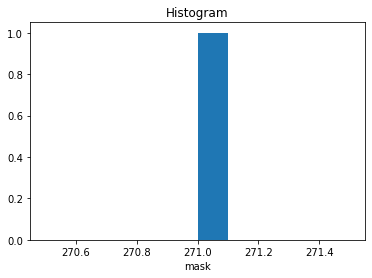

In [36]:
cube.mask.count().plot()